In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
# drop column RowNumber, CustomerID, Surname
df = df.iloc[:,3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Dummy variables in Geography
dummies = pd.get_dummies(df['Geography'])
dummies

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [8]:
df = pd.concat([df,dummies],axis = 1).drop(['Geography','Spain'],axis=1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
# Male = 1, Female = 0
df['Gender'] = np.where(df['Gender'] == 'Male', 1,0)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# Descriptive analysis

In [10]:
# show statistics of each column
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


In [11]:
# Correlation matrix
r_matrix = df.corr().round(decimals = 2)
r_matrix

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
CreditScore,1.00,-0.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03,-0.01,0.01
Gender,-0.00,1.00,-0.03,0.01,0.01,-0.02,0.01,0.02,-0.01,-0.11,0.01,-0.02
Age,-0.00,-0.03,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29,-0.04,0.05
Tenure,0.00,0.01,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01,-0.00,-0.00
Balance,0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12,-0.23,0.40
NumOfProducts,0.01,-0.02,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05,0.00,-0.01
HasCrCard,-0.01,0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01,0.00,0.01
IsActiveMember,0.03,0.02,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16,0.00,-0.02
EstimatedSalary,-0.00,-0.01,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01,-0.00,0.01
Exited,-0.03,-0.11,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00,-0.10,0.17


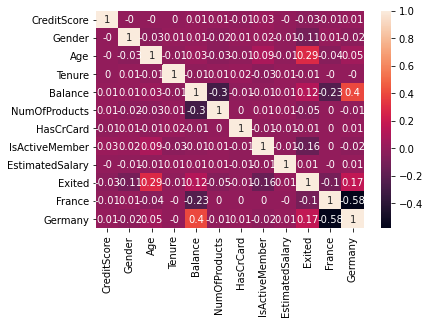

In [12]:
# Visualize correlation matrix
import seaborn as sns
sns.heatmap(r_matrix,annot = True)

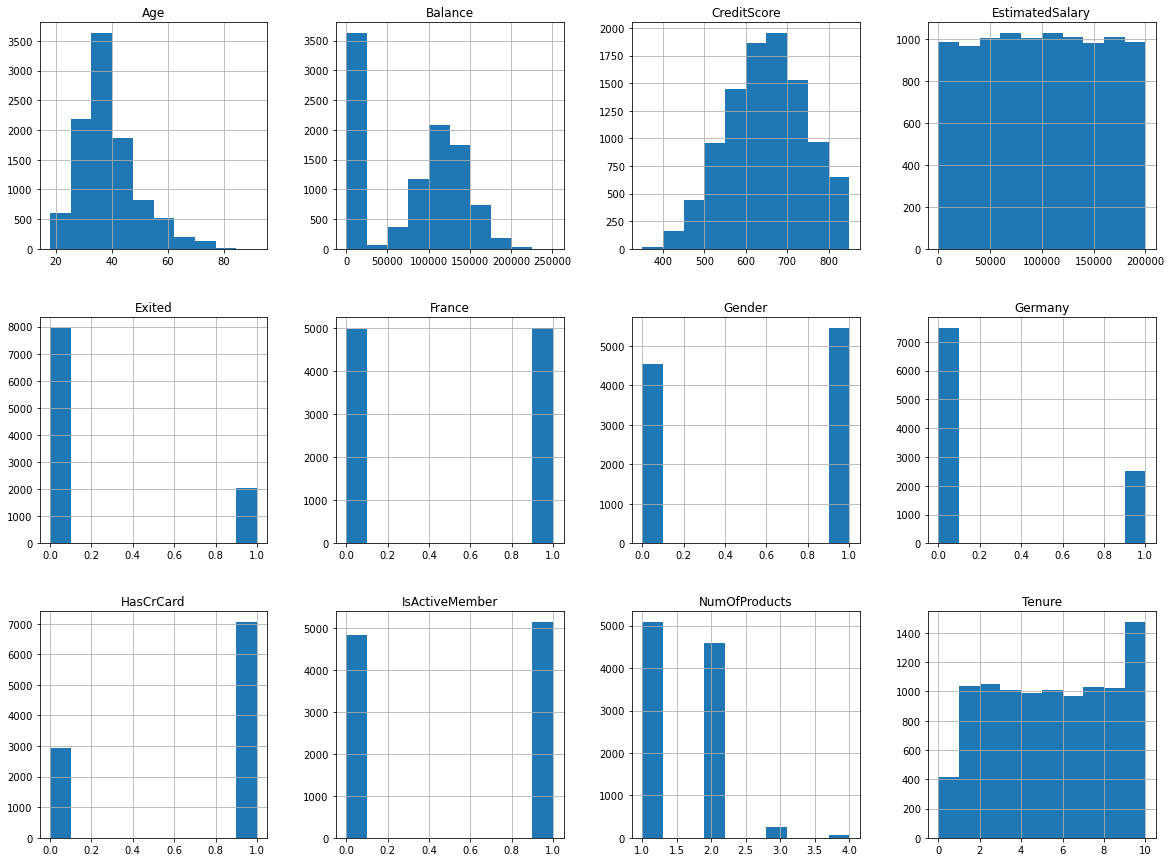

In [13]:
# Create histogram
import matplotlib.pyplot as plt
df.hist(layout = (3,4),figsize = (20,15))
plt.show()
# ==> balance, creditscore: normal distribution

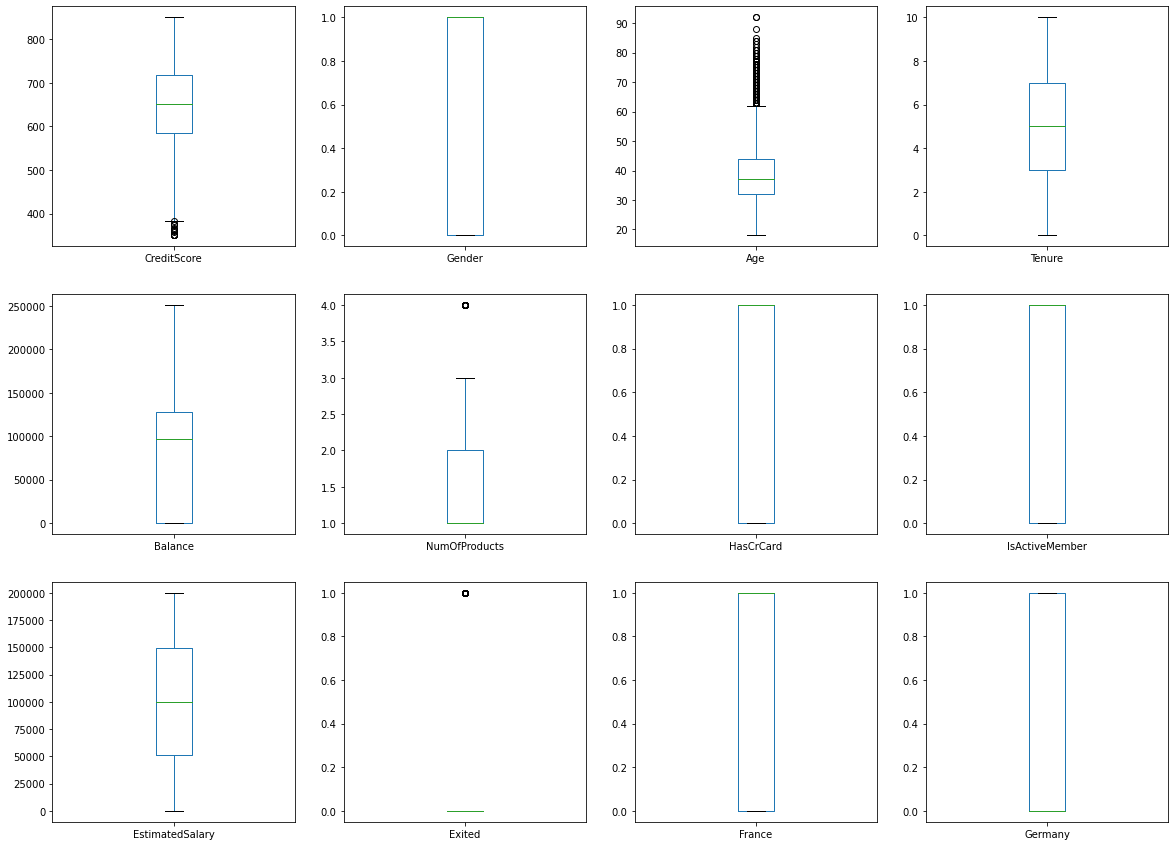

In [14]:
# Create box plot for each column
df.plot(kind = 'box',subplots = True, figsize = (20,15),layout=(3,4), sharex = False, sharey = False)
plt.show()

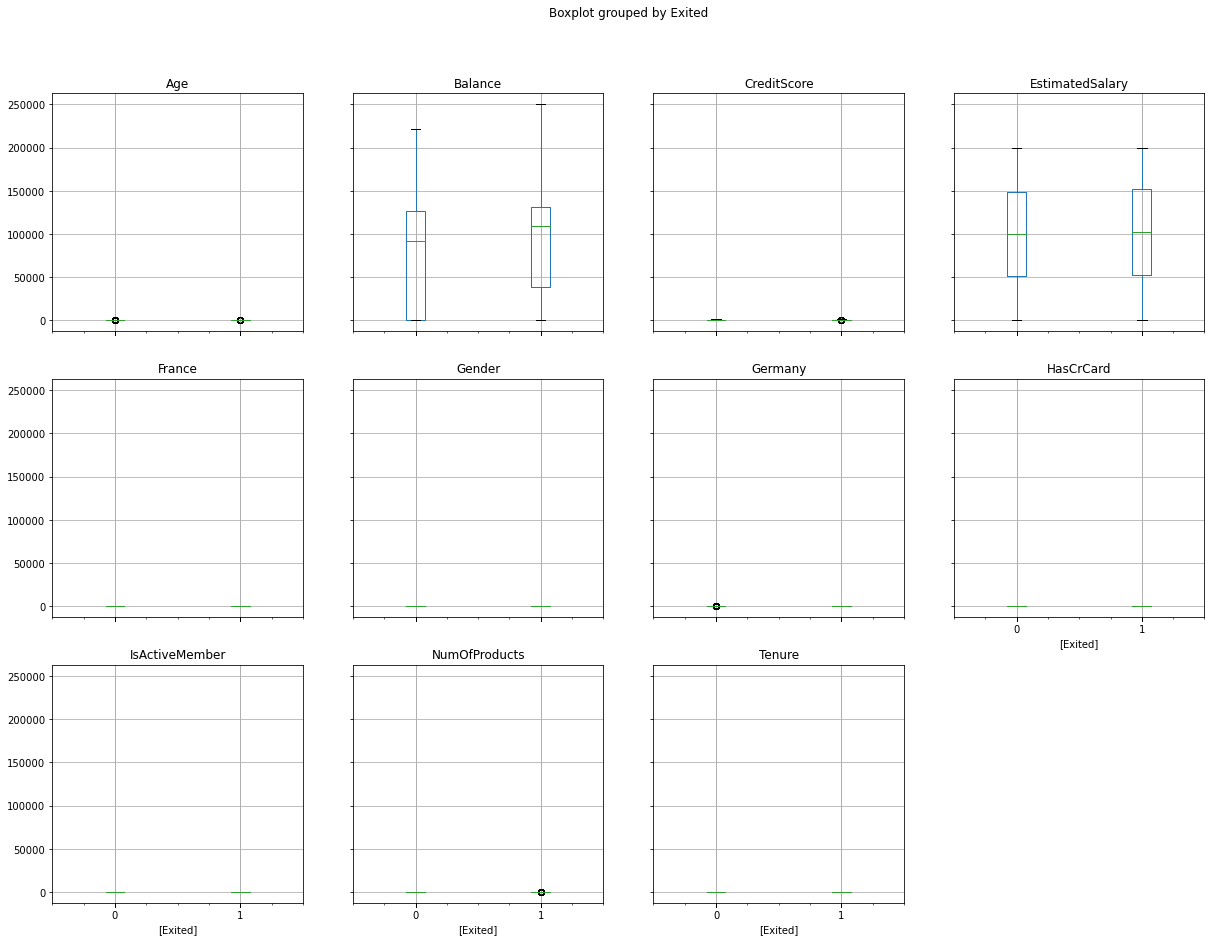

In [15]:
# Box plot group by Exited column
df.boxplot(by='Exited',figsize = (20,15),layout = (3,4))
plt.show()
# ==> people who is predicted churn has more balance

# Null values and transformation

In [16]:
# Count number of null values in each columns
df.isnull().sum()
# ==> no need to dealing with missing data

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
France             0
Germany            0
dtype: int64

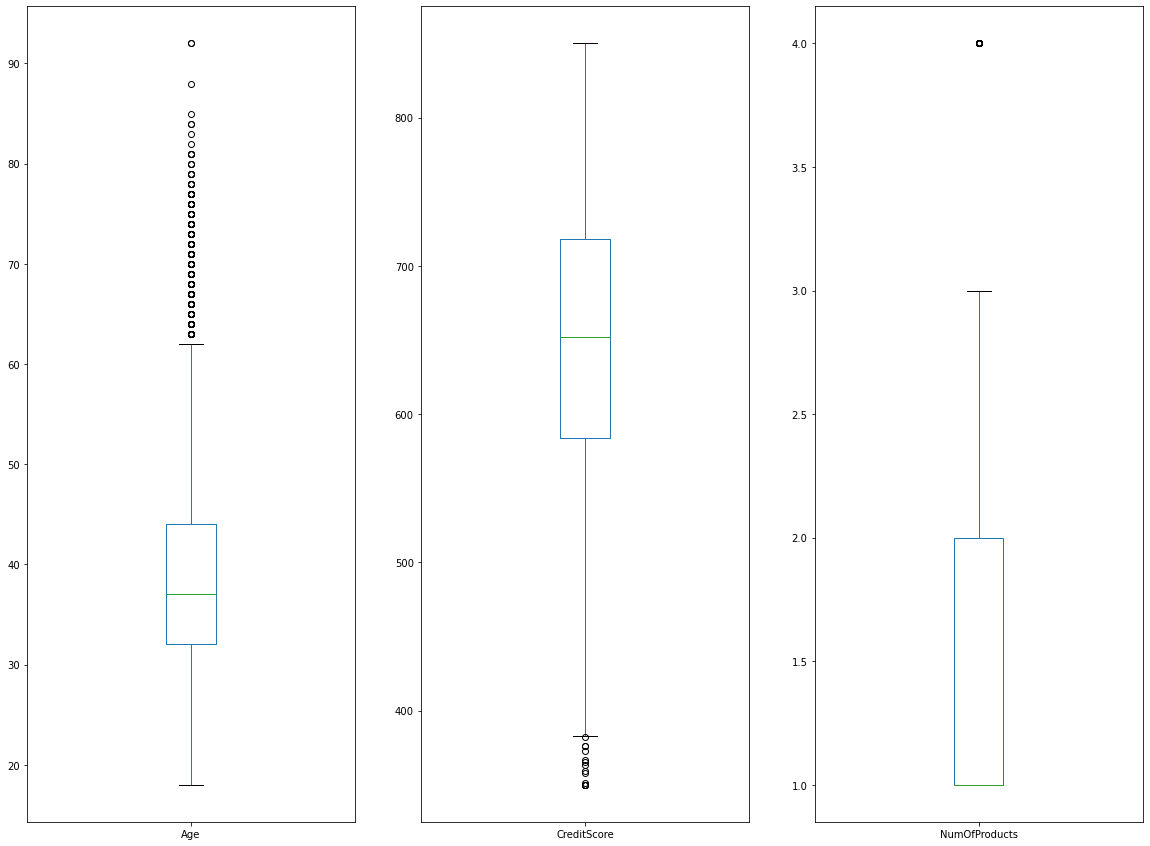

In [17]:
# Dealing with extreme outliers
df[['Age','CreditScore','NumOfProducts']].plot(kind = 'box',subplots = True, figsize = (20,15),layout=(1,3))
plt.show()

In [18]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [19]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


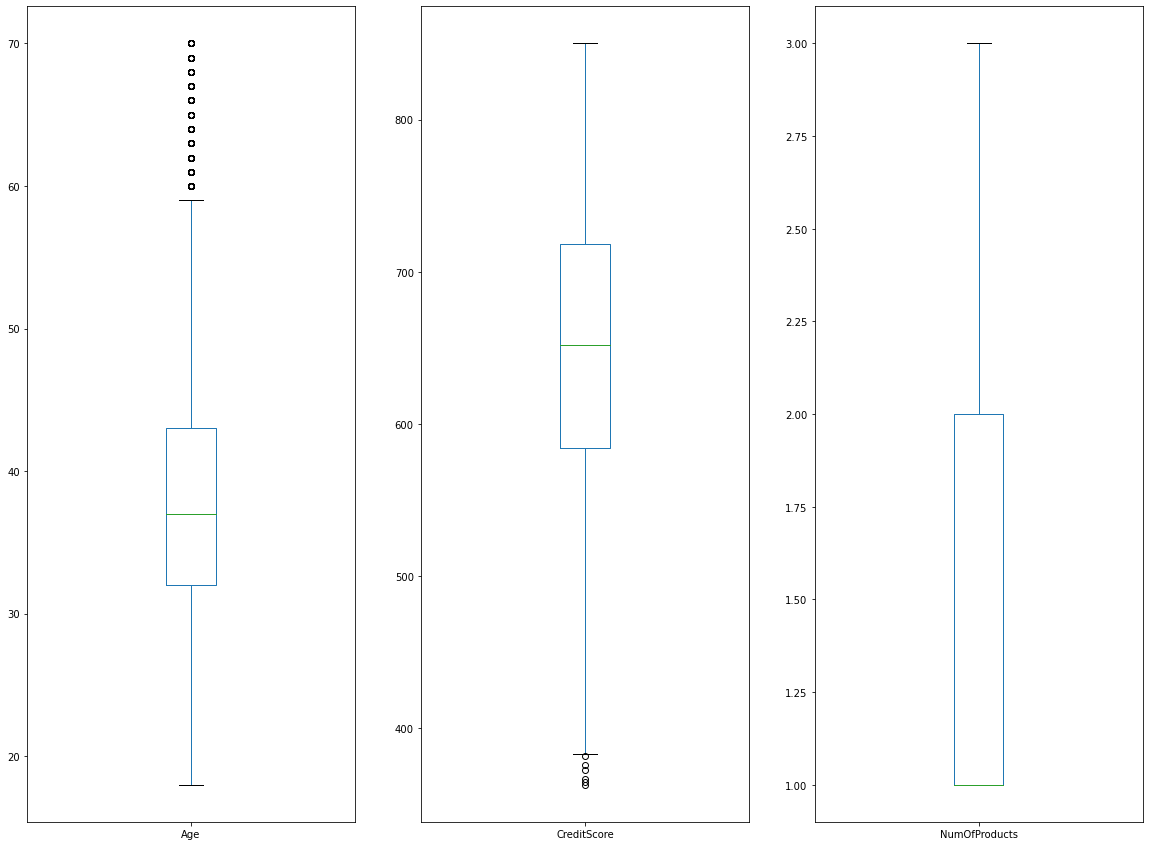

In [20]:
df[['Age','CreditScore','NumOfProducts']].plot(kind = 'box',subplots = True, figsize = (20,15),layout=(1,3))
plt.show()

# Fit models

In [21]:
# Splitting into training test and test set
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis = 1)
y = df['Exited']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

In [22]:
# Fit models
from sklearn import  model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
results=[]
names=[]
seed=7

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.794666(0.017161)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CARD:0.784868(0.010673)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN:0.766501(0.016740)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA:0.821609(0.016795)
NB:0.794803(0.018506)


C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\ngong\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM:0.798477(0.018555)


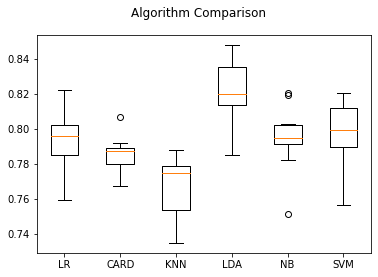

In [24]:
# Compare accuracy using boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# LDA

In [25]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8220408163265306
[[1884   89]
 [ 347  130]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1973
           1       0.59      0.27      0.37       477

    accuracy                           0.82      2450
   macro avg       0.72      0.61      0.63      2450
weighted avg       0.80      0.82      0.79      2450



[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

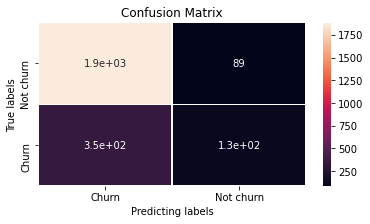

In [26]:
cm1=confusion_matrix(y_test,predictions)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5);

# labels, title and ticks
ax.set_xlabel('Predicting labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Churn', 'Not churn']); ax.yaxis.set_ticklabels(['Not churn', 'Churn'])

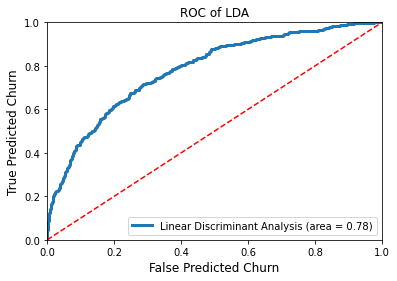

<Figure size 576x576 with 0 Axes>

In [27]:
#Plot ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
lda_roc_auc = roc_auc_score(y_test, lda.predict_proba(X_test)[:,1])
lda_roc_auc

lda_FPr, lda_TPr, threshold = roc_curve(y_test, lda.predict_proba(X_test)[:,1])

plt.plot(lda_FPr, lda_TPr, linewidth = 3, label = 'Linear Discriminant Analysis (area = %0.2f)' % lda_roc_auc)
plt.plot([0, 1], [0, 1],'r--')  # Draw the diagonal baseline
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Predicted Churn', fontsize = 12)
plt.ylabel('True Predicted Churn', fontsize = 12)
plt.title('ROC of LDA')
plt.legend(loc = "lower right")
plt.figure(figsize = (8,8))
plt.show()

# SVM

In [28]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, y_train)
predictions1 = svm.predict(X_test)
print(accuracy_score(y_test, predictions1))
print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))

0.8053061224489796
[[1973    0]
 [ 477    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1973
           1       0.00      0.00      0.00       477

    accuracy                           0.81      2450
   macro avg       0.40      0.50      0.45      2450
weighted avg       0.65      0.81      0.72      2450



C:\Users\ngong\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

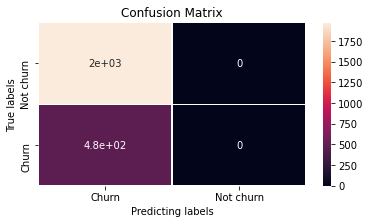

In [29]:
cm2=confusion_matrix(y_test,predictions1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5);

# labels, title and ticks
ax.set_xlabel('Predicting labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Churn', 'Not churn']); ax.yaxis.set_ticklabels(['Not churn', 'Churn'])

# predicting not churn is 0 ==> not choose SVM model

# NB

In [30]:
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions2 = nb.predict(X_test)
print(accuracy_score(y_test, predictions2))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

0.7963265306122449
[[1876   97]
 [ 402   75]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1973
           1       0.44      0.16      0.23       477

    accuracy                           0.80      2450
   macro avg       0.63      0.55      0.56      2450
weighted avg       0.75      0.80      0.76      2450



[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

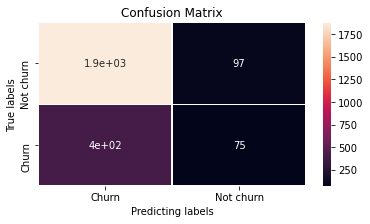

In [31]:
cm3=confusion_matrix(y_test,predictions2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm3, annot=True, ax = ax,linewidths=.5);

# labels, title and ticks
ax.set_xlabel('Predicting labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Churn', 'Not churn']); ax.yaxis.set_ticklabels(['Not churn', 'Churn'])

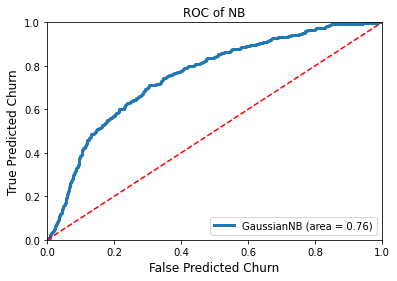

<Figure size 576x576 with 0 Axes>

In [32]:
# Plot ROC curve
nb_roc_auc = roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])
nb_roc_auc

nb_FPr, nb_TPr, threshold = roc_curve(y_test, nb.predict_proba(X_test)[:,1])

plt.plot(nb_FPr, nb_TPr, linewidth = 3, label = 'GaussianNB (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')  # Draw the diagonal baseline
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Predicted Churn', fontsize = 12)
plt.ylabel('True Predicted Churn', fontsize = 12)
plt.title('ROC of NB')
plt.legend(loc = "lower right")
plt.figure(figsize = (8,8))
plt.show()

# LR

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions3 = lr.predict(X_test)
print(accuracy_score(y_test, predictions3))
print(confusion_matrix(y_test, predictions3))
print(classification_report(y_test, predictions3))

0.8028571428571428
[[1920   53]
 [ 430   47]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1973
           1       0.47      0.10      0.16       477

    accuracy                           0.80      2450
   macro avg       0.64      0.54      0.53      2450
weighted avg       0.75      0.80      0.75      2450



[Text(0, 0.5, 'Not churn'), Text(0, 1.5, 'Churn')]

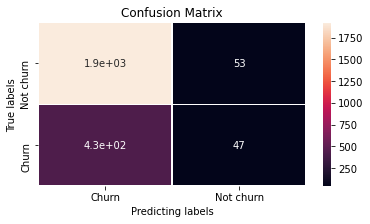

In [34]:
cm4=confusion_matrix(y_test,predictions3)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm4, annot=True, ax = ax,linewidths=.5);

# labels, title and ticks
ax.set_xlabel('Predicting labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Churn', 'Not churn']); ax.yaxis.set_ticklabels(['Not churn', 'Churn'])

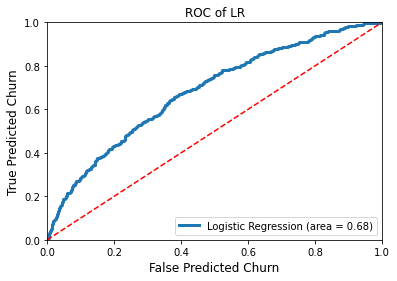

<Figure size 576x576 with 0 Axes>

In [35]:
# Plot ROC curve
lr_roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
lr_roc_auc

lr_FPr, lr_TPr, threshold = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

plt.plot(lr_FPr, lr_TPr, linewidth = 3, label = 'Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')  # Draw the diagonal baseline
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Predicted Churn', fontsize = 12)
plt.ylabel('True Predicted Churn', fontsize = 12)
plt.title('ROC of LR')
plt.legend(loc = "lower right")
plt.figure(figsize = (8,8))
plt.show()